[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv12 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2502.12524-b31b1b.svg)](https://arxiv.org/abs/2502.12524)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/sunsmarterjie/yolov12)

[YOLOv12](https://github.com/sunsmarterjie/yolov12) is the latest model in the YOLO series, developed by Yunjie Tian, Qixiang Ye, David Doermann and introduced in the paper [YOLOv12: Attention-Centric Real-Time Object Detectors](https://arxiv.org/abs/2502.12524).

This model achieves both lower latency and higher mAP than previous state-of-the-art models like YOLOv11, YOLOv10, and RT-DETR.

<img src="https://raw.githubusercontent.com/sunsmarterjie/yolov12/main/assets/tradeoff.svg" width=100%>

In this guide, we are going to walk through how to fine-tune a YOLOv12 model on a custom dataset.

Without further ado, let's get started!

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv12
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [2]:
!nvidia-smi

Mon Jun  2 09:24:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install supervision flash-attn --upgrade -q
# # import os
# # os.environ['CUDA_FORCE_FP16'] = '0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 67.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.7 MB/s eta 0:00:00


## Install YOLOv12 from Source

**NOTE:** Currently, YOLOv12 does not have its own PyPI package. Therefore, we need to install the code from the source.

You can install YOLOv12 with the code below:

In [6]:
!git clone https://github.com/sunsmarterjie/yolov12
#!git clone https://github.com/ultralytics/yolov12
%cd yolov12
# !pip install roboflow supervision flash-attn --upgrade -q
!pip install -r requirements.txt
!pip install -e ./''
# !pip install --upgrade flash-attn
# !wget https://github.com/Dao-AILab/flash-attention/releases/download/v2.7.3/flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

Cloning into 'yolov12'...
remote: Enumerating objects: 980, done.
remote: Counting objects: 100% (285/285), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 980 (delta 256), reused 228 (delta 228), pack-reused 695 (from 1)
Receiving objects: 100% (980/980), 1.58 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (473/473), done.
/content/yolov12
Processing ./flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl (from -r requirements.txt (line 3))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/yolov12/flash_attn-2.7.3+cu11torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl'

Obtaining file:///content/yolov12
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralyt

## Download example data

In [7]:
!pip install ultralytics supervision opencv-python torch torchvision torchaudio flash-attn --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 924.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8

Next, let's download an example image of a person and a dog that we can use to test our model:

In [9]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2025-06-02 09:32:58--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2025-06-02 09:32:58 (102 MB/s) - ‘dog.jpeg’ saved [106055/106055]




0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1987.1ms
Speed: 4.0ms preprocess, 1987.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


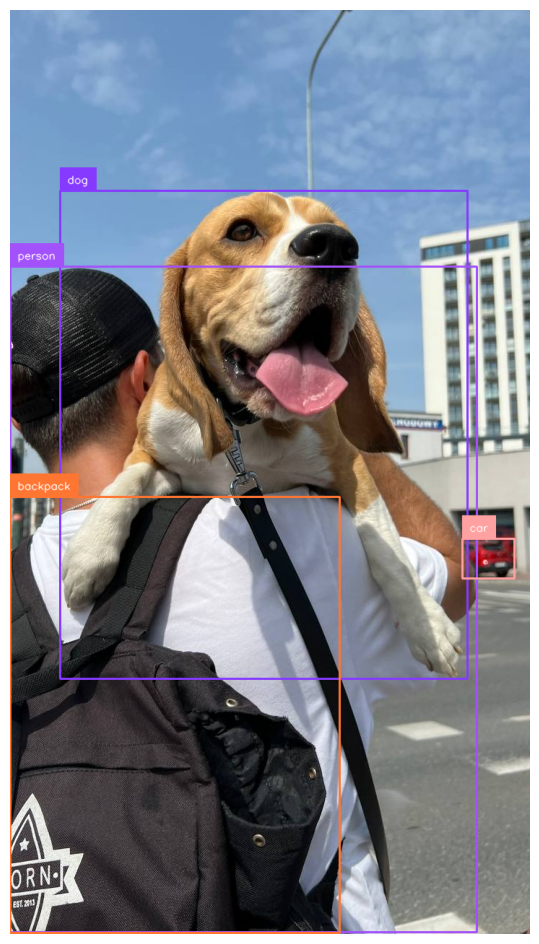

In [10]:
import os

# ✅ Disable FlashAttention (if on older GPUs)
os.environ["FLASHATTN_DISABLED"] = "1"

# ✅ Force CPU mode if GPU is incompatible
import torch
device = "cuda" if torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 8 else "cpu"

# ✅ Import necessary libraries
from ultralytics import YOLO
import supervision as sv
import cv2

# ✅ Load image
image_path = "dog.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

# ✅ Load YOLO model and move to appropriate device
model = YOLO("yolov12x.pt").to(device)

# ✅ Perform inference
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

# ✅ Annotate results
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# ✅ Display annotated image
sv.plot_image(annotated_image)


## Run inference

Let's run the `yolov12n` base model that was trained using the Microsoft COCO dataset. This model comes out of the box with YOLOv12.

We will then use the Roboflow `supervision` Python package to visualize the results from our model.

100%|██████████| 5.26M/5.26M [00:00<00:00, 124MB/s]



0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 58.2ms
Speed: 3.2ms preprocess, 58.2ms inference, 140.0ms postprocess per image at shape (1, 3, 640, 384)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


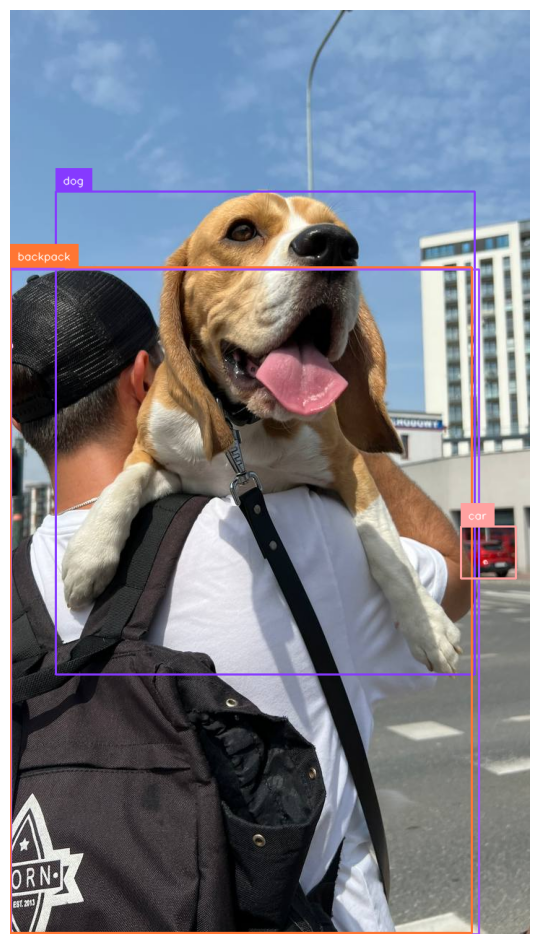

In [8]:
import os
os.environ["TORCH_USE_CUDA_FP16"] = "0"
from ultralytics import YOLO
import supervision as sv
import cv2

image = cv2.imread("dog.jpeg")

model = YOLO('yolov12n.pt')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

The YOLOv12 model successfully identifies the person and dog in the image.

You can experiment with different model sizes by replacing `yolov12n.pt` with:

- yolov12n.pt
- yolov12s.pt
- yolov12m.pt
- yolov12l.pt
- yolov12x.pt

## Train a model

Now, let's fine-tune a YOLOv12 model using a custom dataset.

For this guide, we will use a yard management dataset hosted on Roboflow Universe. This dataset contains images of shipping containers and other industrial objects.

We will:

- Download the dataset
- Train the model
- View the trained model confusion matrix
- Run our model on an image

### Download dataset from Roboflow Universe

If you do not already have one, create a [free Roboflow account](https://app.roboflow.com). When you run the code below, you will be asked for your API key. This will allow you to export the dataset we will use for training.

You can use any dataset in the [YOLOv8 PyTorch TXT format](https://roboflow.com/formats/yolov8-pytorch-txt).

In [11]:
!pip install roboflow --upgrade -q # Install the roboflow library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.


In [12]:
from google.colab import userdata
from roboflow import Roboflow

#ROBOFLOW_API_KEY = userdata.get('MMQccvY9HKjgRLQzIwLO')

rf = Roboflow(api_key="MMQccvY9HKjgRLQzIwLO")
project = rf.workspace("bg-kim-sookmyung-ac-kr").project("pokercard_2023")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov12 in progress : 85.0%
Version export complete for yolov12 format



Extracting Dataset Version Zip to PokerCard_2023-1 in yolov12:: 100%|██████████| 525/525 [00:00<00:00, 7686.03it/s]


In [13]:
!ls
!pwd

app.py	  examples    PokerCard_2023-1	tests
assets	  LICENSE     pyproject.toml	ultralytics
docker	  logs	      README.md		ultralytics.egg-info
dog.jpeg  mkdocs.yml  requirements.txt	yolov12x.pt
/content/yolov12


We need to make a few changes to our downloaded dataset so it will work with YOLOv12. Run the following code to prepare your dataset for training:

In [14]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

### Train the model

We are now ready to train a YOLOv12 model.

Below, repalce `yolov12s.yaml` with the checkpoint from which you want to start training. You can use:

- yolov12n.pt
- yolov12s.pt
- yolov12m.pt
- yolov12l.pt
- yolov12x.pt

We recommend training for at least 250 epochs.

Once you have set your training checkpoint, run the code cell below to start training.

**Note ⚠️:** After all epochs run, the `model()` will return a `TypeError: argument of type 'PosixPath' is not iterable` error. This has been [filed as an issue](https://github.com/sunsmarterjie/yolov12/issues/2). If you see this error after training, your model weights will still be saved and you can safely proceed to running inference.

In [15]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(
  data=f'{dataset.location}/data.yaml',
  epochs=250
)

New https://pypi.org/project/ultralytics/8.3.147 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/yolov12/PokerCard_2023-1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 78.5MB/s]


AMP: checks passed ✅


train: Scanning /content/yolov12/PokerCard_2023-1/train/labels... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<00:00, 2299.51it/s]

train: New cache created: /content/yolov12/PokerCard_2023-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/yolov12/PokerCard_2023-1/valid/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 709.10it/s]

val: New cache created: /content/yolov12/PokerCard_2023-1/valid/labels.cache


Plotting labels to /content/yolov12/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov12/runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      6.91G      3.279      4.832      4.491          4        640: 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         21         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      6.83G      3.103      4.916      4.366          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         21         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      7.04G      3.174       4.59      4.212          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         21         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      6.83G      3.084      4.585      4.082          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         21         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      6.85G      3.064      4.347      3.987          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      6.85G      3.017      4.245      3.862          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         21         33          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      6.83G      2.954      4.173      3.765          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         21         33   0.000996      0.153    0.00312   0.000459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      7.03G      2.831      4.086      3.644          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         21         33    0.00365      0.317    0.00368   0.000895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      6.85G      2.713      3.991      3.505          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         21         33      0.196      0.373      0.048    0.00552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      6.86G      2.717      3.902      3.407          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         33      0.369      0.128      0.035    0.00802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      7.01G      2.575      3.693      3.248          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         21         33      0.018      0.343     0.0171    0.00343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      7.05G      2.506      3.546      3.182          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         21         33      0.274      0.221      0.113     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      6.83G       2.48      3.394       3.21          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         21         33    0.00346     0.0417    0.00919    0.00321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      6.86G      2.452      3.351      3.109          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         21         33      0.439      0.228     0.0889       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      7.01G      2.361      3.281      2.971          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         21         33     0.0547      0.131     0.0811     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      6.88G      2.219      2.966      2.918          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.289      0.497      0.178     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      7.02G      2.227      2.954      2.841          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         33      0.443     0.0486     0.0783     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      7.03G       1.96      3.207      2.645          0        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         33     0.0972      0.321      0.143     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      6.99G      2.055      2.819      2.756          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         21         33     0.0456      0.201     0.0715     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      6.85G      1.995      2.767      2.752          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         21         33      0.193      0.405      0.278      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      6.85G      1.949      2.709      2.605          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         21         33      0.428      0.292      0.253      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      7.03G      1.916      2.609      2.568          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.192      0.384      0.359      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      6.98G      1.982      2.754      2.647          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         21         33      0.401      0.307      0.291      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      6.87G      1.888      2.646      2.552          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         21         33      0.227      0.617      0.399      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      6.85G       1.76      2.359      2.452          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         21         33      0.331      0.647      0.425      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250         7G      1.794      2.555      2.498          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         21         33      0.413      0.449      0.548      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      6.82G      1.719      2.345      2.398          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         21         33      0.356      0.481      0.431      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      6.85G       1.76      2.378      2.409          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         21         33      0.433      0.483      0.461      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      6.83G      1.648      2.339      2.328          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         21         33      0.229      0.403      0.313      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      6.87G      1.581      2.251      2.257          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         21         33      0.478      0.501      0.338      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      6.85G      1.582      2.138      2.234          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         21         33      0.269      0.568      0.364      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      6.87G       1.61      2.134      2.264          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         21         33      0.347       0.62      0.463      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      6.85G      1.646      2.249      2.259          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         33      0.488      0.554      0.525      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      6.84G      1.567      2.044      2.239          5        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         21         33      0.455      0.723       0.54      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250         7G       1.52      1.952      2.164          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         21         33      0.435      0.547      0.501      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      6.87G      1.416      1.953      2.084          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.313      0.735      0.448       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      6.83G      1.475      1.972      2.128          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         21         33        0.4      0.746      0.567      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      6.86G      1.424      1.939      2.096          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         21         33      0.314      0.786      0.514      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      6.99G      1.422      1.938      2.081          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         21         33      0.603      0.604      0.603      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      6.85G      1.368      1.808      2.041          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33      0.356      0.859      0.546      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      6.85G      1.353      1.721      1.986          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         21         33      0.405      0.772       0.58      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      6.86G      1.512      1.883      2.081          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         21         33      0.605       0.71      0.634      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      7.01G      1.297      1.686      1.957          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         21         33      0.368       0.68      0.523      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      6.87G      1.356      1.715      2.001          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         21         33      0.451      0.624      0.459       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      6.85G      1.283      1.718      1.925          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         21         33      0.376      0.522      0.442      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      7.01G      1.394      1.727      2.033          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         21         33        0.4      0.713      0.566      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      6.82G      1.265       1.61      1.903          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         21         33      0.305      0.675      0.565      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      6.85G      1.308      1.672      1.924          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         21         33      0.495      0.512      0.582      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      6.85G      1.295      1.603      1.917          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         33      0.729      0.437      0.604      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      6.87G      1.251      1.575      1.894          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         21         33      0.295       0.91      0.587      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      6.85G      1.305      1.609      1.927          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         21         33      0.313      0.729      0.545      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      7.02G      1.313      1.689      1.948          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         21         33      0.612      0.675      0.583       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      6.83G      1.258      1.599      1.873          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         21         33      0.481      0.767      0.709      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      6.86G      1.204      1.527      1.832          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         21         33      0.591      0.683      0.551      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      7.01G      1.277       1.62      1.878          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         21         33      0.428      0.725      0.538      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      7.02G      1.326       1.55      1.995          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         21         33       0.53      0.662      0.679        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      6.85G      1.243       1.69      1.869          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.589      0.746      0.768      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      6.87G      1.219       1.57      1.844          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         21         33      0.527      0.875      0.727      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      7.01G      1.199       1.55      1.825          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         21         33      0.564      0.606      0.637       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      6.86G      1.246      1.598       1.85          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         21         33      0.443      0.694      0.659      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      7.01G      1.183      1.484      1.791          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33      0.351       0.66      0.538      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      7.03G      1.207      1.475      1.827          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         21         33      0.433      0.594      0.529      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      6.99G      1.243      1.486        1.8          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         21         33      0.411      0.762      0.625      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      6.87G      1.199      1.586      1.812          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         21         33      0.463      0.772      0.699      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      6.83G      1.345      1.562      1.897          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         21         33      0.671      0.657      0.721      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      6.87G        1.1      1.547      1.645          0        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         21         33      0.413      0.752      0.588      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      6.84G      1.173      1.461      1.753          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         21         33      0.464      0.697      0.637      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      6.88G      1.183      1.474       1.77          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.611      0.706       0.71      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      6.83G       1.14      1.413      1.757          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33       0.79      0.534      0.648      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      7.03G      1.113      1.378      1.702          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         21         33      0.456      0.856      0.663      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      6.84G      1.083      1.428       1.71          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         21         33      0.606      0.687      0.689      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      6.88G      1.099      1.367      1.706          2        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         21         33      0.566       0.65      0.669      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      6.86G      1.164      1.416       1.79          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         21         33      0.707      0.561        0.6      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      7.03G      1.183      1.497      1.707          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         21         33      0.567      0.816      0.756      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      7.01G      1.145      1.358      1.761          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         33      0.498      0.917      0.823      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      6.87G      1.081      1.258      1.651          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         21         33      0.654      0.712      0.793      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      7.02G      1.187      1.419      1.751          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         21         33      0.462      0.781      0.642      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      6.86G      1.077      1.221       1.67          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.551      0.819      0.749      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      6.84G      1.128      1.285      1.717          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         21         33       0.59      0.782      0.821      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      7.02G      1.064      1.256      1.641          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         21         33      0.617      0.577       0.57      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      6.85G      1.048      1.205      1.657          4        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         21         33      0.635      0.607      0.618      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      7.03G      1.076      1.314       1.68          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33      0.549      0.827      0.701      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      6.83G      1.103      1.304      1.689          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         21         33      0.562      0.861      0.718      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      6.86G      1.096      1.391      1.661          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         21         33      0.539      0.785      0.715      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      6.86G      1.047      1.285      1.631          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         21         33      0.534      0.585      0.654      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      6.87G      1.052      1.276      1.627          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         21         33      0.685      0.773      0.796       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      6.85G      1.056      1.208      1.601          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         21         33      0.703      0.664      0.753       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      7.02G      1.123      1.313      1.667          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         21         33      0.644      0.796      0.804      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      6.86G      1.042       1.23      1.645          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33      0.628      0.716      0.785      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      7.03G      1.017      1.158      1.615          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         21         33      0.558      0.838       0.77      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      7.01G      1.035      1.205      1.665          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.583      0.851      0.809      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      7.01G      1.055      1.193      1.649          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         21         33      0.456      0.746      0.694      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      6.86G      1.073      1.223      1.621          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         21         33      0.596      0.809      0.751       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      7.01G      1.052      1.215      1.641         10        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         21         33      0.674       0.75      0.813      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      7.01G      1.029      1.222      1.598          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         21         33      0.631      0.736       0.79      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      6.85G      1.005      1.096      1.574          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.527      0.769      0.758      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      6.85G      1.002      1.185      1.629          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         21         33       0.48      0.797      0.705       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      6.86G      1.042      1.153      1.618         14        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         21         33      0.659      0.723      0.778      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      7.01G     0.9681      1.159      1.585          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         21         33       0.72      0.776      0.843      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      7.02G     0.9946      1.145      1.591          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         21         33      0.617      0.832      0.716      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      6.83G     0.9913      1.066      1.571          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         21         33      0.561      0.784      0.693      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      7.03G      1.004       1.15      1.594          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         21         33      0.723      0.823      0.831      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      6.84G     0.9811      1.098      1.588          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         21         33       0.51      0.758      0.696      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      6.86G      1.014      1.138      1.581          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         21         33      0.538      0.797      0.734      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      6.85G       1.11      1.082      1.747          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         21         33      0.537      0.704      0.707       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      7.03G     0.9867      1.158      1.599          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         21         33      0.823      0.822      0.889      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      6.84G     0.9482      1.075      1.538          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         21         33      0.543       0.83      0.789      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      6.85G     0.8925       1.01      1.458          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         21         33      0.622        0.8      0.757      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      6.85G     0.9816      1.116      1.572          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         21         33      0.635      0.784      0.775       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      7.03G     0.9646      1.053      1.508          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         21         33      0.704      0.759      0.842       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      6.82G     0.9241       1.13      1.432          0        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33      0.595      0.712      0.702      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      7.01G      0.982      1.082      1.559          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.613      0.759      0.751      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      6.85G      1.025      1.149      1.584          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         21         33      0.729      0.731      0.849      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      7.03G     0.9184     0.9842      1.476          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         21         33      0.635      0.751      0.726      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      6.84G     0.9869      1.077      1.532          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         21         33      0.646      0.731      0.722      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      6.85G     0.9535      1.162      1.546          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.604      0.841      0.791      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      6.83G     0.9713      1.143      1.558          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         21         33      0.603      0.782      0.736      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      7.03G     0.9469      1.086       1.54          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.608      0.845      0.788      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      6.98G      1.077      1.116      1.542          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         21         33      0.535      0.801      0.766      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      6.87G     0.9607      1.054      1.516          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         21         33      0.627      0.762      0.767      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      6.84G     0.9529      1.038      1.499          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         21         33      0.672      0.775      0.799      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      7.03G     0.9385      1.016        1.5          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         21         33      0.621      0.769      0.747      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      6.84G     0.8877     0.9765      1.463          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.565      0.787      0.735      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      6.85G     0.9136     0.9494      1.471          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         21         33      0.556      0.762       0.75      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      6.86G     0.8851      1.204      1.423          0        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         21         33      0.605      0.736      0.782      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      7.02G     0.9461      1.028      1.478         12        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         21         33      0.679      0.772       0.83      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      6.98G      0.891     0.9434      1.474          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         33      0.832      0.776      0.818      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      6.85G     0.9727      1.097      1.456          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         21         33      0.745      0.746      0.854      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      6.85G      0.829      1.123       1.36          0        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.737      0.695      0.761      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      7.02G     0.9504      1.062      1.491          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         21         33      0.608      0.725      0.782      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      6.98G     0.9111       1.11       1.44          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         21         33      0.636      0.836      0.793      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      6.87G     0.8525     0.9482      1.445          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         21         33      0.742      0.784        0.8      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      6.85G     0.8649     0.9947       1.42          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         21         33      0.617      0.795      0.799        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      7.01G     0.9275     0.9549      1.506          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         21         33      0.669      0.798      0.812      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      6.83G     0.9071     0.9019      1.463          5        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         21         33      0.741      0.908      0.853      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      6.88G     0.8705      0.962      1.416          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         21         33       0.64      0.704      0.747      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      6.85G     0.9073     0.9402      1.509          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         21         33      0.912       0.65       0.84      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      7.01G     0.8413     0.9527      1.433          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         21         33      0.736      0.881      0.867      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      7.02G      1.046      1.231      1.636          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         21         33      0.578       0.92       0.84      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      6.85G      0.952     0.9523      1.593          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33       0.59      0.787      0.757      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250         7G     0.8794     0.9041      1.467          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         33      0.688      0.816      0.793      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      7.01G     0.9038     0.9306      1.468          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         21         33      0.686      0.758      0.817      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      7.01G     0.8319     0.8633      1.423          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         21         33      0.493      0.832      0.775      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      7.02G     0.8312     0.9222      1.411          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.829      0.846      0.892      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      6.83G     0.8057     0.8605      1.417          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         33       0.73      0.755      0.853      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      7.04G     0.9148     0.9304      1.449          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         33      0.582       0.77      0.738      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      7.01G     0.8369      0.829      1.421          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         33       0.64      0.779      0.795       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      6.87G     0.9554     0.9525      1.531          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33      0.689      0.807      0.828      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      6.85G     0.7981     0.8656       1.38          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         21         33      0.713      0.794      0.826      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      7.01G     0.8432     0.9475      1.424          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         21         33      0.614      0.917      0.846      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      6.98G     0.8536     0.9257      1.421          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         21         33      0.731      0.819      0.806      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      6.87G     0.8568      1.007      1.422          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.763      0.827      0.867      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      6.85G      0.793     0.8183      1.357          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         21         33      0.829      0.855      0.922      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      7.03G     0.8571     0.8179      1.448          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         21         33      0.687       0.92      0.872      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      7.01G     0.8516      0.861      1.391          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         21         33      0.659      0.767      0.807      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      7.04G      0.863     0.9077      1.467          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         21         33      0.832      0.728      0.849      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      6.88G     0.8399     0.9068      1.442          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         21         33      0.777      0.784      0.833      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      6.85G      0.834     0.8647      1.413          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         21         33      0.714      0.959      0.907       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      6.83G     0.8003     0.8512       1.38          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         33      0.737      0.921       0.91      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      6.86G     0.7726      0.835      1.353          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         21         33      0.716      0.662      0.739      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      7.01G     0.8814     0.8525      1.429          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.652      0.769      0.794      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      6.84G     0.8193     0.7872      1.398          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         21         33      0.698       0.83      0.787       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      6.83G     0.9712     0.9054      1.559          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.774       0.86      0.844      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      7.01G     0.8412      0.834      1.446          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         21         33      0.593      0.904      0.767      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      6.85G     0.8047     0.8984      1.377          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.632      0.701      0.716      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      6.86G     0.7951     0.8455      1.391          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         21         33      0.698      0.722      0.813      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      7.01G      0.799     0.8292       1.39          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         21         33      0.738      0.812      0.814      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      7.03G     0.7813      0.973      1.361          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         21         33      0.711      0.796      0.797      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      6.85G     0.8273     0.9101      1.403          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         21         33       0.68      0.806      0.804      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      7.02G     0.8192     0.8097      1.396          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         33      0.785      0.785      0.841       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      6.84G     0.8388     0.8684      1.466          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         21         33      0.756      0.786      0.832      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      6.87G     0.8283     0.8662      1.414          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         21         33      0.721      0.833       0.87      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      6.85G     0.8739     0.9097      1.428          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         21         33      0.718      0.775      0.835      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      7.01G     0.7834     0.8405      1.365          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         33       0.79      0.716      0.877      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      7.01G     0.7631      0.844      1.358          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         21         33      0.781      0.766      0.839      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      7.02G     0.7863     0.8067      1.354          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         21         33      0.733      0.795      0.832      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      6.83G     0.9638       1.01      1.533          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         21         33      0.839      0.735      0.831      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      7.01G     0.8011     0.7806      1.357          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         21         33        0.8      0.763      0.806      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      6.83G     0.7522     0.7863      1.319          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         21         33      0.666      0.708      0.784      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      6.86G     0.8106     0.9184      1.392          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         21         33        0.7      0.793      0.811      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      6.86G     0.7693     0.8422      1.351          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         21         33      0.768      0.764      0.839      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      6.86G     0.7292       1.05      1.269          0        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.768      0.746      0.842      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      6.84G     0.8153     0.8453      1.428          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         21         33      0.609      0.759      0.741      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      6.87G      0.874      0.916      1.432          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         21         33      0.816       0.72      0.831      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      6.85G     0.7951     0.7905      1.361          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         21         33       0.82      0.742      0.797      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      6.86G     0.7764     0.9823      1.337          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         21         33      0.727      0.813      0.807      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      7.01G     0.8062     0.7658      1.376          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         21         33      0.797      0.734      0.842      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      6.85G     0.7802     0.7777      1.342          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         21         33      0.636      0.826      0.802      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      6.85G     0.7656     0.7598      1.318          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         21         33      0.613      0.889      0.797      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      6.84G     0.7351     0.7525      1.312          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         21         33      0.709      0.838      0.838      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250         7G     0.7887     0.8319      1.353          8        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         33      0.756      0.858      0.855      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      6.85G     0.7852      0.747      1.357          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         21         33      0.721      0.779      0.847      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      6.85G     0.7287     0.7189      1.294          3        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         21         33      0.611       0.91      0.824      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      6.84G     0.8274     0.8044      1.417          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         21         33      0.756       0.75      0.808       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      6.99G     0.7652     0.7598      1.327          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         21         33      0.801      0.732      0.791      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250       6.9G     0.6944     0.7147      1.292          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         21         33      0.784      0.724      0.805      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      6.83G     0.8081     0.8199      1.382          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         21         33      0.755      0.788      0.799      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      6.86G     0.7905     0.8127      1.348          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         33      0.705      0.843      0.817       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      6.99G     0.8494     0.8904      1.385          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         21         33      0.715      0.742      0.817      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      6.87G     0.7496     0.7304      1.355          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         21         33      0.636      0.839        0.8      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      6.85G      0.707     0.7481      1.275          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         21         33      0.668      0.794      0.811      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      6.87G     0.7784     0.7716      1.384          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         21         33      0.767      0.714      0.771      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      7.02G      0.909     0.8635      1.496          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         21         33      0.793      0.708      0.794       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      6.87G     0.7923      0.811      1.368          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         21         33      0.803      0.757       0.81      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250      6.83G     0.8566     0.8353      1.396          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         21         33      0.772      0.737      0.801      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      7.03G     0.6761     0.8743      1.213          0        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         21         33      0.809      0.677      0.795      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      6.82G     0.7313     0.7314      1.307          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         21         33      0.737      0.759      0.805      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      6.87G     0.6853     0.6595      1.246          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         21         33      0.719      0.801      0.816      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      6.83G     0.8089     0.8334      1.369          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         21         33      0.688      0.852      0.811      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      6.86G     0.7472     0.6979      1.306          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         21         33      0.768      0.698      0.799      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      6.84G     0.7137     0.7481      1.299          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.745       0.74      0.808      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      6.87G     0.8269     0.8765      1.436          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         21         33      0.775       0.72      0.805      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      6.83G     0.7118     0.7002      1.292          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         21         33      0.707      0.783      0.795      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      6.86G     0.7078     0.7004      1.301          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         21         33      0.708      0.877      0.828       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      6.99G     0.8467     0.7977      1.458          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         21         33      0.851      0.727      0.835      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      6.85G     0.9028     0.7943      1.394          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         21         33      0.815      0.754      0.805      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      6.85G     0.6788      0.744      1.301          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         21         33      0.777      0.778      0.829      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      7.03G     0.7743     0.7716      1.491          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         21         33      0.714      0.851      0.833      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      6.82G     0.6957     0.7497      1.261          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         21         33      0.678      0.817      0.815      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      7.01G     0.7326     0.6797      1.315          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         21         33      0.818      0.728      0.826      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      6.85G     0.7121     0.7076      1.301          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         21         33      0.858      0.729      0.818      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      7.02G     0.6927     0.7025      1.278          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         21         33      0.833      0.714      0.829      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      7.01G     0.7455     0.6879       1.32          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         21         33      0.721      0.768      0.855       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      7.02G     0.7293     0.7098      1.281          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         21         33      0.692      0.922      0.876      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      6.83G     0.7409     0.7873      1.312          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         21         33      0.697      0.821      0.816      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      7.03G     0.7348     0.7224      1.322          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         21         33      0.682      0.821      0.814      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      6.99G     0.7037     0.7202      1.265          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         33      0.701      0.807      0.815      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      6.87G     0.7055     0.7174      1.275          9        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         21         33      0.711      0.846      0.831       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      6.83G     0.7056     0.7226      1.286          3        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         21         33      0.752      0.798      0.835        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      6.86G     0.6743     0.6719      1.264          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33      0.852       0.74      0.839      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250      7.01G     0.6471     0.6614      1.232          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         21         33      0.841      0.723      0.835      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      7.04G     0.6398     0.6794      1.236          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         21         33        0.7      0.827      0.816      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      6.85G     0.7307     0.7255      1.302          9        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         21         33      0.692      0.848       0.81      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      7.01G      0.709     0.6823      1.284          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         33      0.699      0.832      0.812      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      6.98G     0.7427     0.7868      1.355          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         21         33      0.695      0.853      0.826      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      6.85G     0.6577     0.6421       1.24          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         21         33      0.736      0.817      0.829      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      6.86G     0.6627     0.6647      1.244          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         21         33      0.773      0.812      0.847       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      6.86G     0.6539     0.6659      1.264          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         21         33      0.761      0.798      0.842      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      6.85G     0.6713     0.6146      1.244          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         21         33      0.749      0.799      0.844      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      6.88G     0.6797      0.645      1.221          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         21         33      0.749      0.806      0.833      0.725


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      6.83G     0.5537     0.5843      1.232          1        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         21         33       0.86      0.722      0.833       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250         7G     0.5593     0.5076      1.161          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         21         33      0.849      0.735      0.826      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      6.82G     0.4916     0.5055      1.124          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         21         33      0.814      0.761      0.821       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      6.86G     0.5514     0.6561      1.176          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         21         33      0.817      0.751      0.811      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      6.83G     0.5126       0.49      1.161          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         33      0.822       0.72      0.809      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      6.84G     0.5494     0.4787      1.204          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         21         33      0.829      0.702       0.81      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      6.99G     0.5303     0.4925      1.183          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         21         33      0.699      0.843      0.819      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      7.01G     0.4826     0.4337      1.096          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         21         33      0.707      0.842      0.827      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      6.83G     0.5276     0.5293      1.171          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         21         33      0.709      0.844      0.826      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      7.01G     0.5042     0.4627      1.156          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         21         33      0.705      0.844      0.826      0.728



250 epochs completed in 0.637 hours.
Optimizer stripped from /content/yolov12/runs/detect/train/weights/last.pt, 18.7MB
Optimizer stripped from /content/yolov12/runs/detect/train/weights/best.pt, 18.7MB

Validating /content/yolov12/runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,076,530 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


                   all         21         33      0.715      0.958      0.907       0.76
                   ace          2          2      0.839          1      0.995      0.647
                  jack          5          7      0.635          1      0.814      0.674
                  king          6          6      0.845          1      0.972      0.838
                  nine          5          6      0.575      0.906      0.931      0.855
                 queen          6          8      0.627          1      0.933      0.807
                   ten          4          4      0.769      0.844      0.796      0.739
Speed: 0.2ms preprocess, 8.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/yolov12/runs/detect/train


In [16]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/yolov12/runs/detect/train/

args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1748856955.0d1441b99f42.576.0  train_batch2.jpg
F1_curve.png					   train_batch3600.jpg
labels_correlogram.jpg				   train_batch3601.jpg
labels.jpg					   train_batch3602.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   weights
results.csv


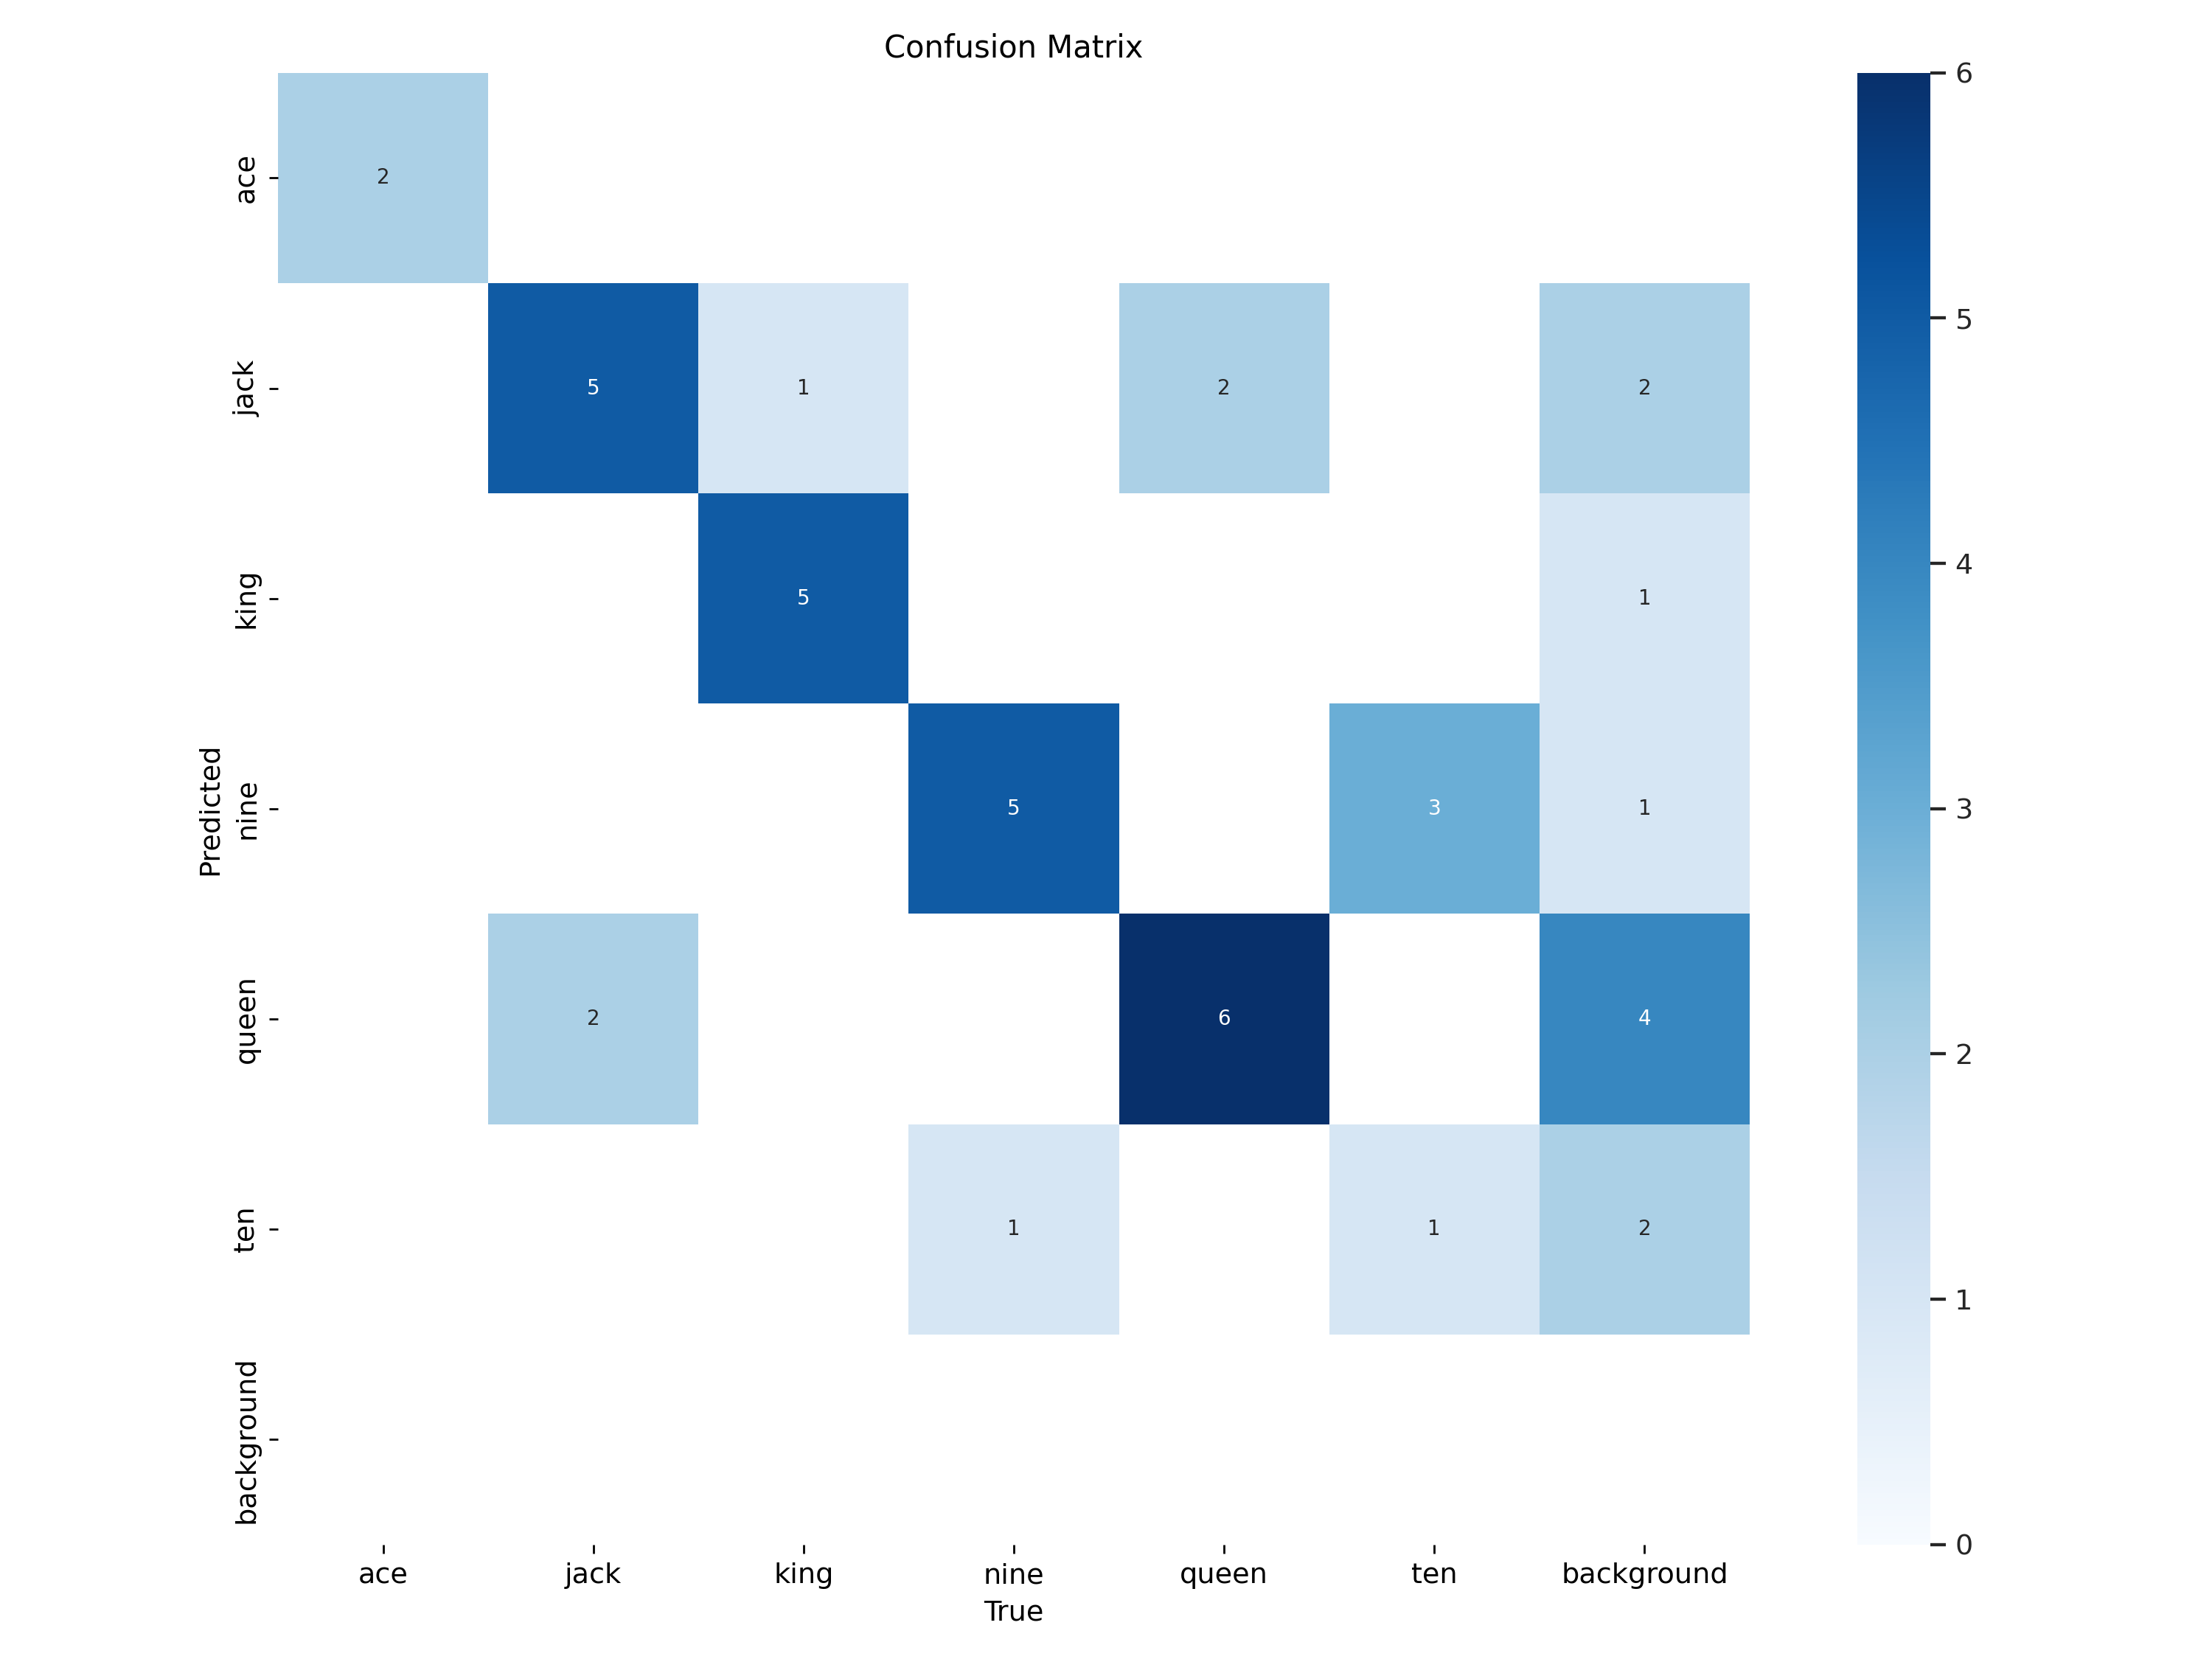

In [17]:
from IPython.display import Image

Image(filename=f'/content/yolov12/runs/detect/train/confusion_matrix.png', width=600)

/content


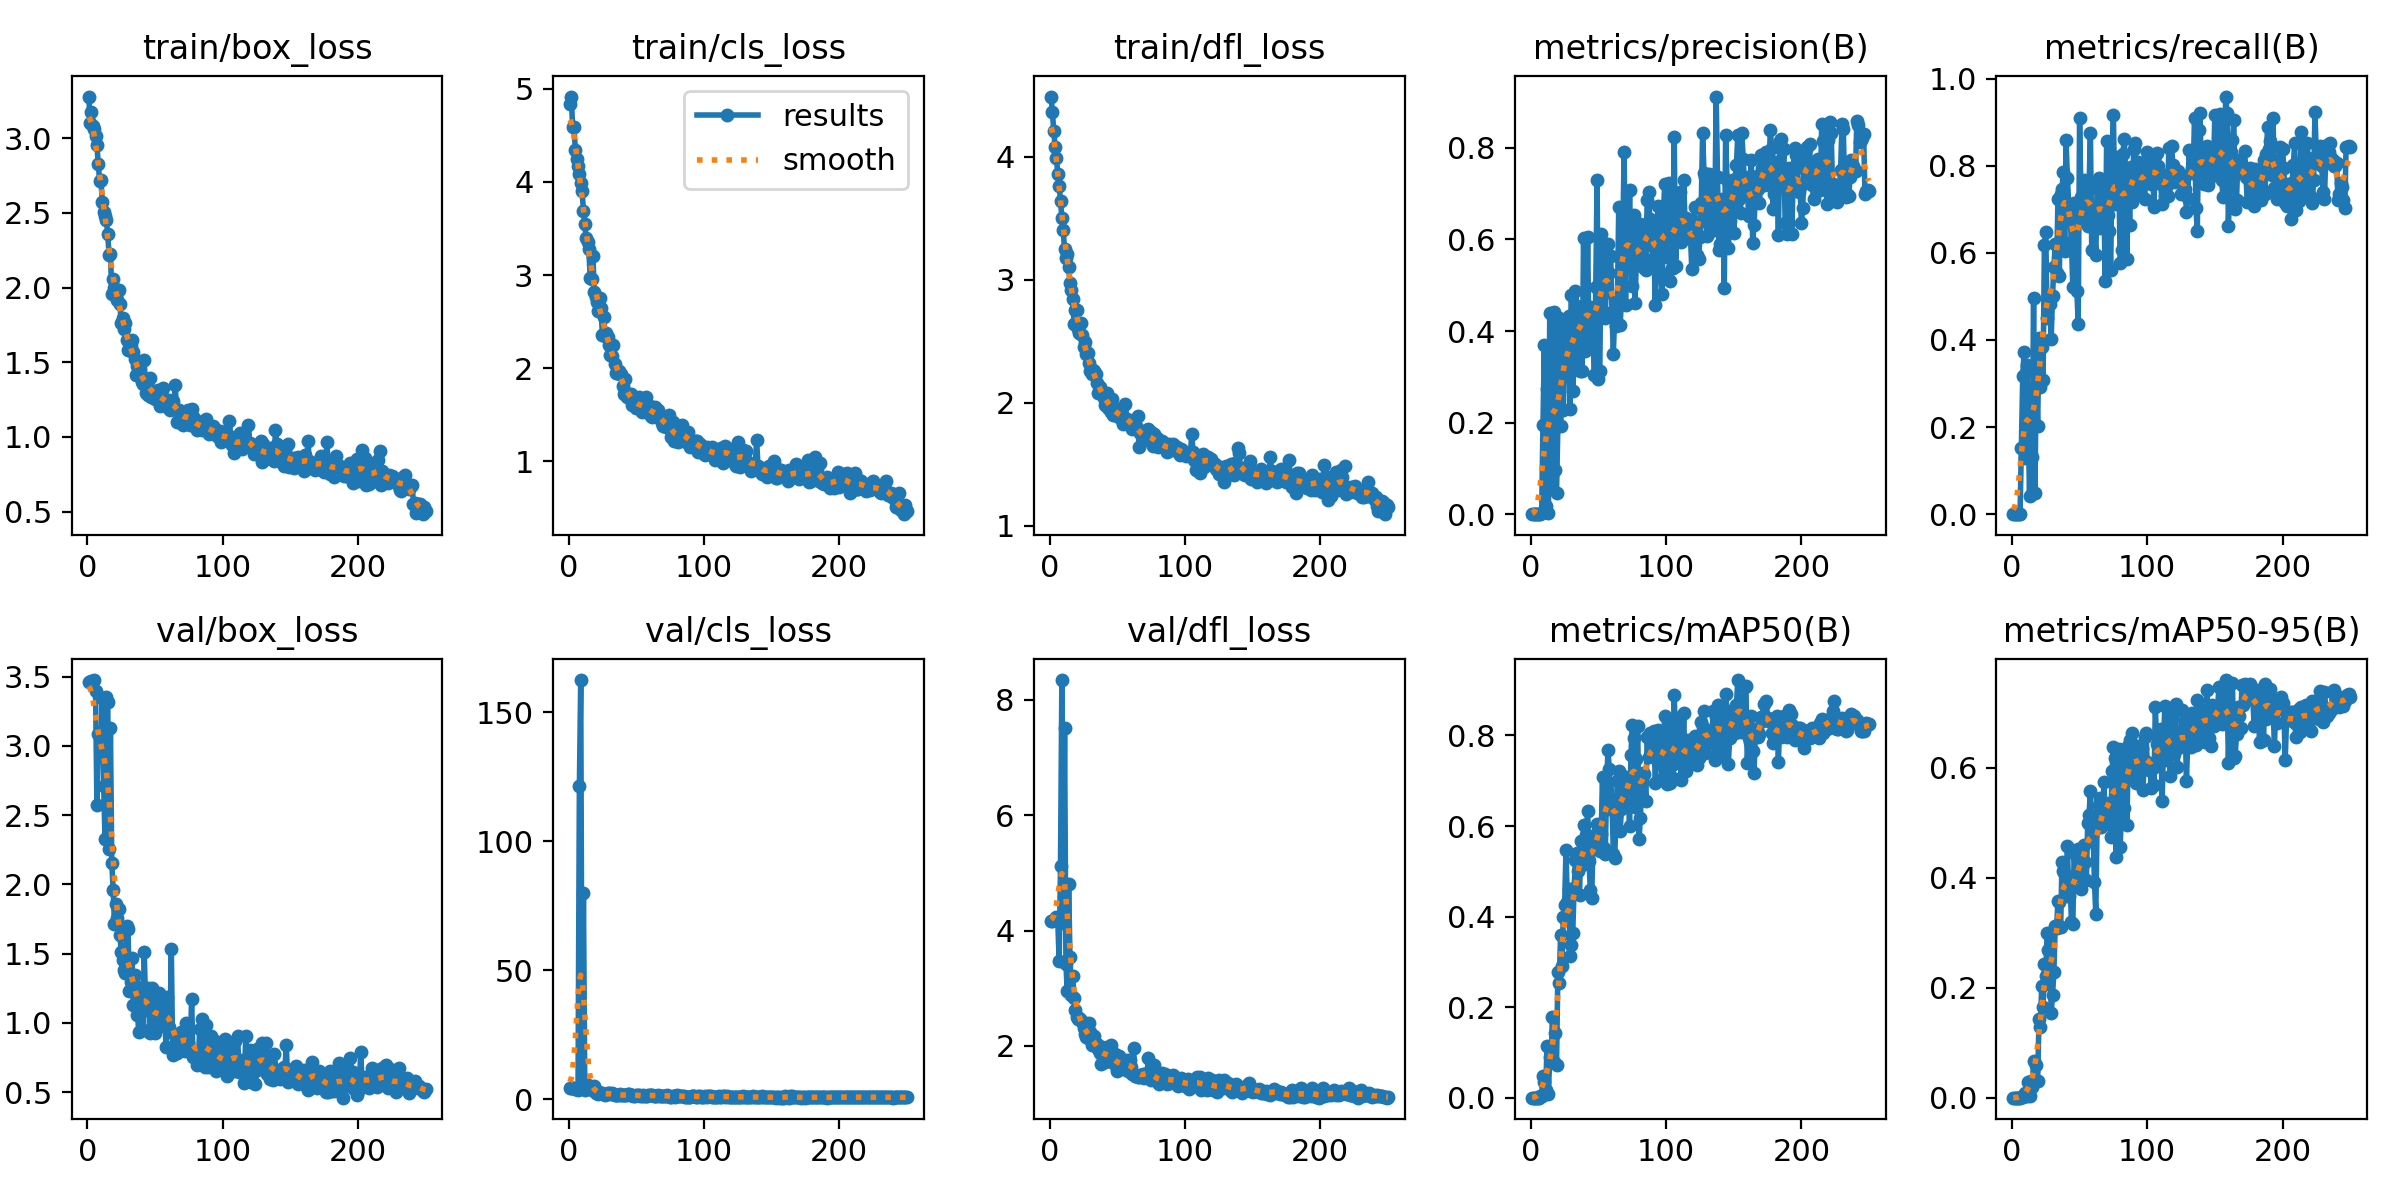

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/yolov12/runs/detect/train/results.png', width=600)

## Run inference with trained model

We can run our trained model on a random image from the `valid` set of our dataset using the following code:

In [19]:
import random

model = YOLO(f"/{HOME}/yolov12/runs/detect/train/weights/best.pt")

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 640x640 2 queens, 1 ten, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


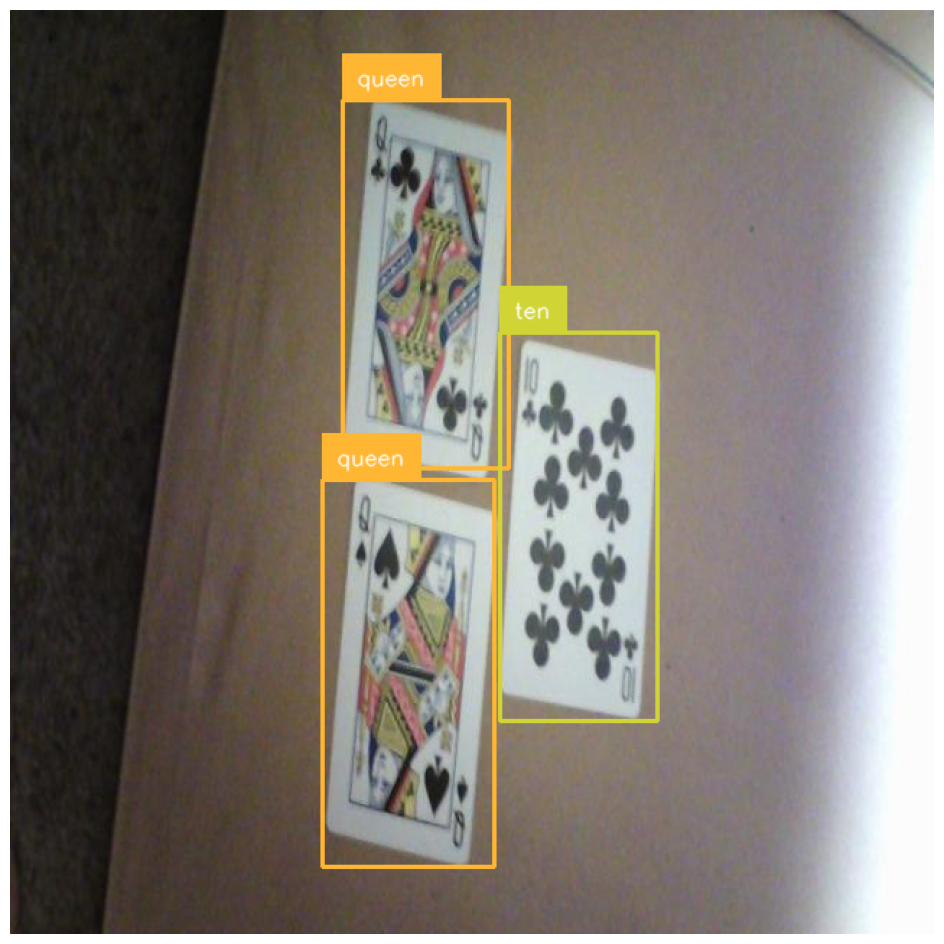

In [20]:
image = random.choice(list(ds.images.keys()))
image = cv2.imread(image)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

results = model(image)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [36]:
%cd /content/yolov12/
!ls -al /content/yolov12/ultralytics/engine/

/content/yolov12
total 304
drwxr-xr-x  3 root root  4096 Jun  2 09:32 .
drwxr-xr-x 13 root root  4096 Jun  2 09:32 ..
-rw-r--r--  1 root root 69155 Jun  2 09:28 exporter.py
-rw-r--r--  1 root root    70 Jun  2 09:28 __init__.py
-rw-r--r--  1 root root 53290 Jun  2 09:28 model.py
-rw-r--r--  1 root root 17740 Jun  2 09:28 predictor.py
drwxr-xr-x  2 root root  4096 Jun  2 09:32 __pycache__
-rw-r--r--  1 root root 75114 Jun  2 09:28 results.py
-rw-r--r--  1 root root 37434 Jun  2 09:28 trainer.py
-rw-r--r--  1 root root 11976 Jun  2 09:28 tuner.py
-rw-r--r--  1 root root 14901 Jun  2 09:28 validator.py


In [38]:
%cd /content/yolov12/
!ls

/content/yolov12
app.py	  examples    PokerCard_2023-1	runs		      yolov12n.pt
assets	  LICENSE     pyproject.toml	tests		      yolov12x.pt
docker	  logs	      README.md		ultralytics
dog.jpeg  mkdocs.yml  requirements.txt	ultralytics.egg-info


In [40]:
# export ONNX for ONNX inference
model.export(format="onnx", half=True)  # or format="onnx" or format="onnx"

Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.7.0+cu126 CPU (Intel Xeon 2.20GHz)
WARNING ⚠️ half=True only compatible with GPU export, i.e. use device=0

PyTorch: starting from '//content/yolov12/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (17.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 217.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 248.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 306.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 259.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 333.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 19.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command 

'//content/yolov12/runs/detect/train/weights/best.onnx'

In [41]:
!ls /content/yolov12/runs/detect/train/weights/ -al

total 72248
drwxr-xr-x 2 root root     4096 Jun  2 11:10 .
drwxr-xr-x 3 root root     4096 Jun  2 10:14 ..
-rw-r--r-- 1 root root 36636194 Jun  2 11:10 best.onnx
-rw-r--r-- 1 root root 18665386 Jun  2 10:14 best.pt
-rw-r--r-- 1 root root 18665386 Jun  2 10:14 last.pt


In [42]:
#Copy the weight/structure file to your Google drive (my drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
!cp /content/yolov12/runs/detect/train/weights/best.onnx /content/drive/MyDrive/Yolov12_best.onnx
!ls /content/drive/MyDrive

# You can implement your local service with "Yolov12_best.onnx" file where you have...!!!

'1. 2023년도 연구센터 평가결과보고서_양식_인공지능혁신연구센터.xlsx'
 1-s2.0-S0141938215000980-main.pdf
 20.09.10_사업자등록증_숙명여대산단.pdf
'2017-publication-9500-3차년도_중간점검(초안)(검토본).pptx'
 2019-CONTEXT-9500-1차년도-연차보고서_김병규교수님연구실_수정본.hwp
'2021년 지역특화산업육성+(R&D)지역주력산업육성 최종평가 보고서-210615-수정본.hwp'
'2024-2 (일반형)캡스톤디자인 결과보고서 양식_김병규.hwp'
'240416_2024년_약자를_위한기술개발_지원사업_과제계획서_숙대내용 보완본.hwp'
 2_별첨_기획처_전체교수회의_발표자료.pdf
'4_별첨3_연구처_세종대 전문가 특강 발표 요약.pdf'
 7BE9317B-6093-42D9-98D2-6F440380AB20.jpeg
'8-2021-138 - 수정_저자교정본(1).hwp'
'8-2021-138 - 수정_저자교정본.hwp'
 AI-and-Blockchain-powered-IoT_CFP.pdf
'A Study on Deep learning-based Hand Drawing Psychological Analysis_final.hwp'
 bus.jpg
'Byung-Gyu Kim (2).jpg'
 cam_image51.jpg
 cam_image52.jpg
 CFP_IIOT_IOT-J.pdf


In [54]:
#---- Define processing functions -------#
import torchvision
import onnxruntime as ort
import time, random

img_size = 640

def box_iou(box1, box2, eps=1e-7):
        # https://github.com/pytorch/vision/blob/master/torchvision/ops/boxes.py
        """
        Return intersection-over-union (Jaccard index) of boxes.
        Both sets of boxes are expected to be in (x1, y1, x2, y2) format.
        Arguments:
            box1 (Tensor[N, 4])
            box2 (Tensor[M, 4])
        Returns:
            iou (Tensor[N, M]): the NxM matrix containing the pairwise
                IoU values for every element in boxes1 and boxes2
        """

        # inter(N,M) = (rb(N,M,2) - lt(N,M,2)).clamp(0).prod(2)
        (a1, a2), (b1, b2) = box1.unsqueeze(1).chunk(2, 2), box2.unsqueeze(0).chunk(2, 2)
        inter = (torch.min(a2, b2) - torch.max(a1, b1)).clamp(0).prod(2)

        # IoU = inter / (area1 + area2 - inter)
        return inter / ((a2 - a1).prod(2) + (b2 - b1).prod(2) - inter + eps)

def non_max_suppression(prediction,
            conf_thres,
            iou_thres,
            classes=None,
            agnostic=False,
            multi_label=False,
            labels=(),
            max_det=300,
            nm=0,  # number of masks
    ):
        """Non-Maximum Suppression (NMS) on inference results to reject overlapping detections

        Returns:
            list of detections, on (n,6) tensor per image [xyxy, conf, cls]
        """

        if isinstance(prediction, (list, tuple)):  # YOLOv5 model in validation model, output = (inference_out, loss_out)
            prediction = prediction[0]  # select only inference output

        device = prediction.device
        mps = 'mps' in device.type  # Apple MPS
        if mps:  # MPS not fully supported yet, convert tensors to CPU before NMS
            prediction = prediction.cpu()
        bs = prediction.shape[0]  # batch size
        nc = prediction.shape[2] - nm - 5  # number of classes
        xc = prediction[..., 4] > conf_thres  # candidates

        # Checks
        assert 0 <= conf_thres <= 1, f'Invalid Confidence threshold {conf_thres}, valid values are between 0.0 and 1.0'
        assert 0 <= iou_thres <= 1, f'Invalid IoU {iou_thres}, valid values are between 0.0 and 1.0'

        # Settings
        # min_wh = 2  # (pixels) minimum box width and height
        max_wh = 7680  # (pixels) maximum box width and height
        max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()
        time_limit = 0.5 + 0.05 * bs  # seconds to quit after
        redundant = True  # require redundant detections
        multi_label &= nc > 1  # multiple labels per box (adds 0.5ms/img)
        merge = False  # use merge-NMS

        t = time.time()
        mi = 5 + nc  # mask start index
        output = [torch.zeros((0, 6 + nm), device=prediction.device)] * bs
        for xi, x in enumerate(prediction):  # image index, image inference
            # Apply constraints
            # x[((x[..., 2:4] < min_wh) | (x[..., 2:4] > max_wh)).any(1), 4] = 0  # width-height
            x = x[xc[xi]]  # confidence

            # Cat apriori labels if autolabelling
            if labels and len(labels[xi]):
                lb = labels[xi]
                v = torch.zeros((len(lb), nc + nm + 5), device=x.device)
                v[:, :4] = lb[:, 1:5]  # box
                v[:, 4] = 1.0  # conf
                v[range(len(lb)), lb[:, 0].long() + 5] = 1.0  # cls
                x = torch.cat((x, v), 0)

            # If none remain process next image
            if not x.shape[0]:
                continue

            # Compute conf
            x[:, 5:] *= x[:, 4:5]  # conf = obj_conf * cls_conf

            # Box/Mask
            box = xywh2xyxy(x[:, :4])  # center_x, center_y, width, height) to (x1, y1, x2, y2)
            mask = x[:, mi:]  # zero columns if no masks

            # Detections matrix nx6 (xyxy, conf, cls)
            if multi_label:
                i, j = (x[:, 5:mi] > conf_thres).nonzero(as_tuple=False).T
                x = torch.cat((box[i], x[i, 5 + j, None], j[:, None].float(), mask[i]), 1)
            else:  # best class only
                conf, j = x[:, 5:mi].max(1, keepdim=True)
                x = torch.cat((box, conf, j.float(), mask), 1)[conf.view(-1) > conf_thres]

            # Filter by class
            if classes is not None:
                x = x[(x[:, 5:6] == torch.tensor(classes, device=x.device)).any(1)]

            # Apply finite constraint
            # if not torch.isfinite(x).all():
            #     x = x[torch.isfinite(x).all(1)]

            # Check shape
            n = x.shape[0]  # number of boxes
            if not n:  # no boxes
                continue
            elif n > max_nms:  # excess boxes
                x = x[x[:, 4].argsort(descending=True)[:max_nms]]  # sort by confidence
            else:
                x = x[x[:, 4].argsort(descending=True)]  # sort by confidence

            # Batched NMS
            c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
            boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
            i = torchvision.ops.nms(boxes, scores, iou_thres)  # NMS
            if i.shape[0] > max_det:  # limit detections
                i = i[:max_det]
            if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
                # update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
                iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
                weights = iou * scores[None]  # box weights
                x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
                if redundant:
                    i = i[iou.sum(1) > 1]  # require redundancy

            output[xi] = x[i]
            if mps:
                output[xi] = output[xi].to(device)
            if (time.time() - t) > time_limit:
                # LOGGER.warning(f'WARNING ⚠️ NMS time limit {time_limit:.3f}s exceeded')
                break  # time limit exceeded

        return output


def xywh2xyxy(x):
        # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
        y = torch.zeros_like(x) if isinstance(x, torch.Tensor) else np.zeros_like(x)
        y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
        y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
        y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
        y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
        return y

# Read classes.txt
def class_name():
        classes=['ace',	'jack',	'king',	'nine',	'queen','ten'
        ]
        return classes

def letterbox(im, color=(114, 114, 114), auto=True, scaleup=True, stride=32):
        # Resize and pad image while meeting stride-multiple constraints
        shape = im.shape[:2]  # current shape [height, width]
        new_shape= img_size
        if isinstance(new_shape, int):
            new_shape = (new_shape, new_shape)

        # Scale ratio (new / old)
        r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
        if not scaleup:  # only scale down, do not scale up (for better val mAP)
            r = min(r, 1.0)

        # Compute padding
        new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
        dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

        if auto:  # minimum rectangle
            dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

        dw /= 2  # divide padding into 2 sides
        dh /= 2

        if shape[::-1] != new_unpad:  # resize
            im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
        top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
        left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
        im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
        return im, r, (dw, dh)

# Initialize ONNXRuntime session
def ort_session(onnx_model):
        providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if ort.get_device()=='GPU' else ['CPUExecutionProvider']
        session = ort.InferenceSession(onnx_model, providers=providers)
        print(session.get_providers())

        return session

# Display results
def result(img,ratio, dwdh, out):
        names= class_name()
        colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}
        for i,(x0,y0,x1,y1,score,cls_id) in enumerate(out):
            box = np.array([x0,y0,x1,y1])
            box -= np.array(dwdh*2)
            box /= ratio
            box = box.round().astype(np.int32).tolist()
            cls_id = int(cls_id)
            score = round(float(score),3)
            name = names[cls_id]
            color = colors[name]
            name += ' '+str(score)
            cv2.rectangle(img,box[:2],box[2:],color,2)
            cv2.putText(img,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)
        return img
        # cv2.imwrite('v5_onnx.jpg', img)
        # cv2.imshow('result',img)
        # cv2.waitKey(0)

In [53]:
!cp /content/drive/MyDrive/cam_image52.jpg .
!ls -al
!pwd

total 122760
drwxr-xr-x 12 root root      4096 Jun  2 11:32 .
drwxr-xr-x  1 root root      4096 Jun  2 11:14 ..
-rw-r--r--  1 root root      5674 Jun  2 09:28 app.py
drwxr-xr-x  2 root root      4096 Jun  2 09:28 assets
-rw-------  1 root root    156014 Jun  2 11:38 cam_image52.jpg
drwxr-xr-x  2 root root      4096 Jun  2 09:28 docker
-rw-r--r--  1 root root    106055 Jun  2  2023 dog.jpeg
drwxr-xr-x 16 root root      4096 Jun  2 09:28 examples
drwxr-xr-x  8 root root      4096 Jun  2 09:28 .git
-rw-r--r--  1 root root     34523 Jun  2 09:28 LICENSE
drwxr-xr-x  2 root root      4096 Jun  2 09:28 logs
-rw-r--r--  1 root root     36633 Jun  2 09:28 mkdocs.yml
drwxr-xr-x  5 root root      4096 Jun  2 09:34 PokerCard_2023-1
-rw-r--r--  1 root root      7892 Jun  2 09:28 pyproject.toml
-rw-r--r--  1 root root     10250 Jun  2 09:28 README.md
-rw-r--r--  1 root root       409 Jun  2 09:28 requirements.txt
drwxr-xr-x  3 root root      4096 Jun  2 09:35 runs
drwxr-xr-x  2 root root      4096 J

In [51]:
!ls /content/yolov12/runs/detect/train/weights/ -al

total 72248
drwxr-xr-x 2 root root     4096 Jun  2 11:10 .
drwxr-xr-x 3 root root     4096 Jun  2 10:14 ..
-rw-r--r-- 1 root root 36636194 Jun  2 11:10 best.onnx
-rw-r--r-- 1 root root 18665386 Jun  2 10:14 best.pt
-rw-r--r-- 1 root root 18665386 Jun  2 10:14 last.pt


In [55]:
# Inference for ONNX model
import torch
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

cuda = True
w = "/content/yolov12/runs/detect/train/weights/best.onnx"
img = cv2.imread('/content/yolov12/cam_image52.jpg')
image, ratio, dwdh = letterbox(img, auto=False)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, 0)
image = np.ascontiguousarray(image)
im = image.astype(np.float32)
im /= 255

#onnxruntime session
session= ort_session(w)
outname = [i.name for i in session.get_outputs()]
inname = [i.name for i in session.get_inputs()]

# print('input-output names:',inname,outname)
inp = {inname[0]:im}

# ONNXRuntime inference
t1 = time.time()
outputs = session.run(outname, inp)[0]
t2 = time.time()
output= torch.from_numpy(outputs)
out = non_max_suppression(output, conf_thres=0.25, iou_thres=0.45)[0]
print('Predictions:',out)
print('yolov12 ONNXRuntime Inference Time:', t2-t1)
imgout=result(img,ratio, dwdh, out)
cv2.imwrite('result.jpg', imgout)
# print('result', img.shape)
# cv2.imshow('result',img)
# cv2.waitKey(0)
cv2_imshow(imgout)

['CUDAExecutionProvider', 'CPUExecutionProvider']
Predictions: tensor([[ 7.3775e+01,  5.0536e+01,  1.7000e+02,  1.5288e+02,  6.0973e+04,  8.2730e+03],
        [ 5.4010e+01,  3.1275e+01,  1.2194e+02,  9.9983e+01,  3.4604e+04,  8.1280e+03],
        [-7.5603e+00, -1.9789e+00,  1.6330e+01,  2.9132e+01,  2.4397e+04,  7.5540e+03],
        [-8.7706e-01,  1.2250e+00,  6.2051e+00,  8.6525e+00,  4.5438e+03,  6.3190e+03]])
yolov5 ONNXRuntime Inference Time: 0.14839601516723633


IndexError: list index out of range

Our model successfully identified objects in our image.

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.